## Example of sampling

Here we illustrate an example of how to generate samples using our small Python package `smpsite`. Many of the sampling capabilities are directly imported from `pmagpy`. 

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import smpsite as smp

import numpy as np
np.random.seed(666)

%matplotlib inline

We define a parameter class defined inside `smpsite` that allow us to specify all the parameters of interest at the same time. These parameters include:
- `N`: Total number of sites
- `n0`: Number of samples per site
- `kappa_within_site`: Concentration parameter of the Fisher distribution in each site
- `site_lat`: Latitude of the site
- `site_long`: Longitude of the site
- `outlier_rate`: Fraction of samples that are randomly taken from the uniform distribution in the sphere, with `0.0` representing no outliers and `1.0` representing all outliers. 
- `secular_method`: Method use to sample VGPs. It includes `G`, `tk03` and `Fisher`. 
- `kappa_secular`: In case of `secular_method="Fisher"`, it specifies the concentration parameter of the Fisher distribution. 

In [2]:
params0 = smp.Params(N=10,
                     n0=4,
                     kappa_within_site=100,
                     site_lat=10, 
                     site_long=0,
                     outlier_rate=0.10,
                     secular_method="G",
                     kappa_secular=None)

Once the parameters are specified, we can just generate a random sample:

In [5]:
%%time

df_sample = smp.generate_samples(params0)

CPU times: user 12 ms, sys: 5.88 ms, total: 17.9 ms
Wall time: 17.2 ms


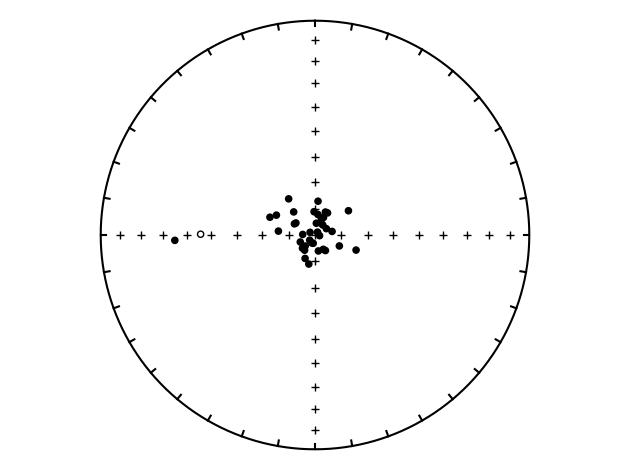

In [6]:
plt.figure()
ipmag.plot_net(1)
ipmag.plot_di(dec=df_sample.vgp_long.values, inc=df_sample.vgp_lat.values)